In [2]:
import numpy as np
from sklearn.cluster import KMeans
import os
import re
import torch

# /data/shehzeen/SSLTTS/SupDataDirs/NewSpecPreprocessing/EnglishSpanishBengCelebEpoch39

In [15]:
# set the directory path containing the embedding files
# content_embedding_path = "/data/shehzeen/SSLTTS/SupDataDirs/NewSpecPreprocessing/EnglishSpanishBengCelebEpoch39/"
content_embedding_path = "/data/shehzeen/SSLTTS/SupDataDirs/NewSpecPreprocessing/Libri360NoAugConformer"

# compile a regular expression pattern to match the desired file names
pattern = 'embedding_content_embedding'
# pattern = re.compile('embedding_content_embedding')

embedding_files=[]
counter = 0

for f in os.listdir(content_embedding_path):
    if (f.startswith(pattern) and counter<1000):
        embedding_files.append(str(f))
        counter +=1
        
# print(embedding_files)

# get a list of file names in the directory that match the pattern
# embedding_files = [f for f in os.listdir(content_embedding_path) if f.startswith(pattern)]

# initialize an empty list to store the embeddings
embeddings = []

# loop over each file and load its contents into the embeddings list
for file in embedding_files:
    embedding = torch.load(os.path.join(content_embedding_path, file))
    embeddings.append(embedding.T)
    
print(embeddings[0].shape)


torch.Size([76, 256])


In [22]:
audio_idx = 2
threshold = 0.90
count = 0
for t in range(embeddings[audio_idx].shape[0]-1):
    e1 = embeddings[audio_idx][t]
    e2 = embeddings[audio_idx][t+1]
    cosine_similarity = torch.nn.functional.cosine_similarity(e1, e2, dim=0)
    if cosine_similarity > threshold:
        count += 1
        print(t, cosine_similarity)
print(count, embeddings[audio_idx].shape[0])

2 tensor(0.9276)
7 tensor(0.9660)
10 tensor(0.9006)
14 tensor(0.9804)
16 tensor(0.9097)
19 tensor(0.9334)
20 tensor(0.9343)
23 tensor(0.9156)
24 tensor(0.9037)
31 tensor(0.9047)
32 tensor(0.9057)
34 tensor(0.9928)
36 tensor(0.9230)
45 tensor(0.9519)
46 tensor(0.9319)
53 tensor(0.9918)
55 tensor(0.9454)
56 tensor(0.9123)
62 tensor(0.9908)
64 tensor(0.9127)
78 tensor(0.9687)
89 tensor(0.9376)
91 tensor(0.9201)
93 tensor(0.9560)
100 tensor(0.9215)
101 tensor(0.9508)
102 tensor(0.9549)
113 tensor(0.9592)
115 tensor(0.9842)
116 tensor(0.9896)
118 tensor(0.9234)
119 tensor(0.9907)
120 tensor(0.9969)
121 tensor(0.9979)
122 tensor(0.9964)
123 tensor(0.9978)
124 tensor(0.9915)
129 tensor(0.9938)
131 tensor(0.9204)
133 tensor(0.9937)
135 tensor(0.9364)
140 tensor(0.9126)
152 tensor(0.9217)
153 tensor(0.9376)
159 tensor(0.9031)
165 tensor(0.9287)
168 tensor(0.9339)
172 tensor(0.9335)
175 tensor(0.9624)
176 tensor(0.9154)
186 tensor(0.9162)
187 tensor(0.9322)
190 tensor(0.9065)
192 tensor(0.9937)


In [5]:
# concatenate the tensors along the first dimension (resulting tensor size: (6, 3))

concatenated_tensor = torch.cat(embeddings, dim=0)

# print the concatenated tensor
print(concatenated_tensor[0])
print(len(concatenated_tensor))

tensor([  2.2581,  -5.1272,  -1.5826,  12.3147,  -3.1712,   5.3697,   1.6485,
         -4.3229,  -5.2805,  -0.6219,  -4.3460,   8.3931,   9.4221,  -8.1140,
          2.0696,   4.6084, -10.2013,   2.1427,   2.3221,   0.1113,  -1.5858,
          0.1592,   0.5576,  -3.6168,  -2.9767,  -5.1975,  -1.1687,   3.2070,
          4.4462,   3.8627,  -5.3357,  -6.3310,   0.3668,  -4.1627,   8.8488,
          1.9904,  -3.1655,  -6.2543,   1.7828,  -0.1857,   7.7641,  -1.7653,
         -8.5141,   0.9696,   5.0197,  -0.5331,  -4.4071,   5.3595,  -6.6497,
          5.2379,  -2.6188,  -0.1626,   0.5320,   2.1617,  13.6381,  -0.2054,
         -1.1268,  -3.0462,   1.7541,   4.5294,   0.3193,   1.4864,   1.0844,
          0.7326,   0.9654,   4.0682,  -4.1685,  -6.2643,  -8.6641,  -7.2166,
          0.4104,  -2.9796,  -6.4679,  -8.0960,   2.9592,   0.2558,  -1.1404,
          6.7417,   0.5412,  -8.2616,  -0.9342,   5.7044,  -2.6838,  -3.7260,
         -2.0171,  -4.3250,  -5.9776,  -0.4674,  -7.9870,  -0.81

In [7]:


# convert the embeddings to a numpy array
embeddings_array = concatenated_tensor[:50000].numpy()

# set number of clusters for k-means
num_clusters = 100

# initialize k-means algorithm with number of clusters and random initialization
kmeans = KMeans(n_clusters=num_clusters, init='random')

# fit k-means to embeddings
kmeans.fit(embeddings_array)

# get cluster labels for each embedding
cluster_labels = kmeans.labels_

# print the cluster labels
# print(cluster_labels)

/home/shehzeen/miniconda3/envs/py38nemo/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


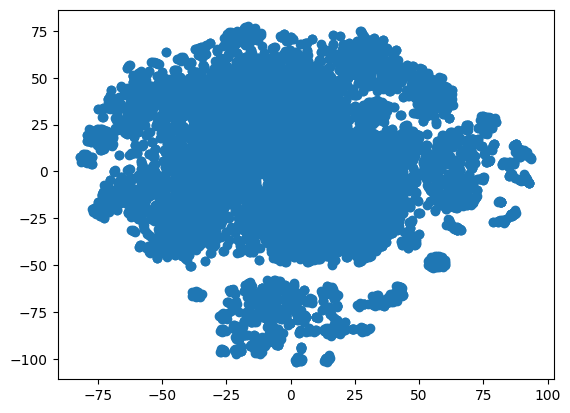

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# load the embeddings from file
# embeddings_array = concatenated_tensor[:10000].numpy()

# compute the t-SNE embeddings
tsne_embeddings = TSNE(n_components=2).fit_transform(embeddings_array)

# plot the t-SNE embeddings
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.show()